## A two layer neural network

- Consists of one hidden layer and one output layer
- Implemented tanh and sigmoid activation functions and using logloss for loss function
- Feedforward and backprop implemented, some theory shown below

In [1]:
import numpy as np

In [4]:
# activation functions
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

#good for classification
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

#loss functions
#logloss is good for classification problems
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

In [7]:
#layer class
class Layer:
    
    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid)
    }
    
    learning_rate = 0.1
    
    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)
    
    def feedForward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A
    
    # all derivatives are wrt to cost
    # expects dA of cur layer
    def backprop(self, dA):
        
        #eleemt by element matrix multip, not a normal dot prod since both matrices have same shape (essentialyl scalar)
        dZ = np.multiply(self.d_act(self.Z), dA)
        
         # need ot normalize weights and divide by number of samples
        # because it is actually a sum of weights
        dW = 1*dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        
        # this is to match shape since biases is supposed to be a col vector with 1 col but dZ has m cols
        # w/ m being num of samples, we want to take avg of all samples in dZ (i.e on a row by row basis, sum of cols
        # and divide by total num of smamples)
        db = 1*dZ.shape[1] * np.sum(dZ, axis = 1, keepdims = True)
        
        dA_prev = np.dot(self.W.T, dZ)
        
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return dA_prev

In [19]:
x_train = np.array([[0, 0, 1, 1], 
                    [0, 1, 0, 1]]) # 2 inputs and 4 samples, i.e 2x4
y_train = np.array([[0, 1, 1, 0]]) #1 x num of samples

m = 4
epochs = 1500

layers = [Layer(2, 3, 'tanh'), Layer(3, 1, 'sigmoid')] # hidden layer and output layer
costs = []

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedForward(A)
    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)
    
    dA = d_logloss(y_train, A) # after the final output layer dA is found like this since A is just the output
    for layer in reversed(layers):
        dA = layer.backprop(dA)

A = np.array([[0], [0]])
for layer in layers:
    A = layer.feedForward(A)
print(A)

[[9.57369217e-05]]


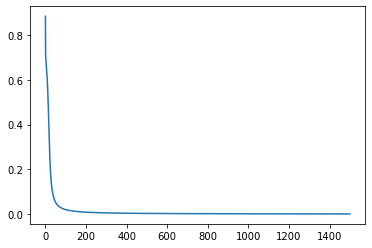

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)